In [1]:
import andi
import numpy as np
import csv as csv
import numpy as np

from sklearn.metrics import mean_absolute_error
import tensorflow as tf



import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import losses, metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM

from keras.layers import Dropout
from keras.layers import Bidirectional
#from keras.models import load_model
from tensorflow.keras.models import load_model
import os
from matplotlib import pyplot as plt
from data_split import data_split
from many_net import many_net, many_net_diffv, many_net_only_diff, many_net_odcv_hd

Using TensorFlow backend.


In [4]:
os.getcwd()

'/Users/stefabo/Documents/GitHub/eduRNN'

Importing the predictions for 1d data

In [2]:
predictions1d=np.load('task2_predictions1d_more_nets.npy')

In [3]:
predictions1d.shape

(16618, 5)

(array([2021., 5945., 4686., 1964., 2002.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <a list of 5 Patch objects>)

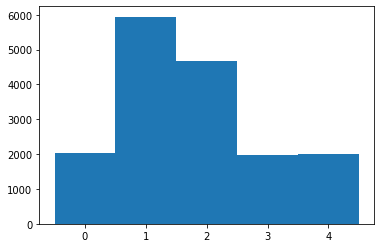

In [7]:
bb=-0.5+np.arange(6)
plt.hist(np.argmax(predictions1d,axis=1),bins= bb)

In [14]:
np.count_nonzero(np.argmax(predictions1d,axis=1)==4)

2002

# 2d case

Importing predictions made on 2d data using nets trained on 2d data

In [4]:
predictions2d_u2d=np.load('task2_predictions2d_using2d_CORRECTED.npy')

In [5]:
predictions2d_u2d.shape

(13309, 5)

Converting output of predictions in two single number indicating what model class it was predicted. Recall 3 is LW

In [6]:
pred2_num=np.argmax(predictions2d_u2d,axis=1)

In [7]:
pred2_num[5]

1

Writing vector identifying all trajectories that were NOT predicted as LW by the 2d nets

In [8]:
aa=pred2_num!=3

In [9]:
np.count_nonzero(aa)

11331

Predictions on 2d data using average of 1d nets applied on different dimensions independently.
We know that this gives a wrong result for LW trajectories

In [10]:
predictions2d_u1d=np.load('task2_predictions2d_more_using2traj_1dnets.npy')

In [11]:
predictions2d_u1d.shape

(13309, 5)

For trajectories that are NOT LW, the 1d nets yield good results.
Here we average the predictions made with 1d nets and the one made on 2d nets for trajectories that were predicted NOT to be LW. 
For the LW traj keep 2d predictions

In [12]:
comb=np.copy(predictions2d_u2d)
comb_ave=(predictions2d_u1d+predictions2d_u2d)/2
comb[aa,:]=comb_ave[aa,:]

Performing checks on the combined outputs

In [13]:
kk=3

In [14]:
predictions2d_u2d[kk]

array([2.81368375e-01, 2.32711864e-05, 1.12689704e-04, 1.27438079e-06,
       7.18494236e-01], dtype=float32)

In [15]:
predictions2d_u1d[kk]

array([6.7091334e-01, 1.5887665e-04, 3.3362240e-02, 4.0948700e-05,
       2.9552466e-01], dtype=float32)

In [16]:
comb[kk]

array([4.7614086e-01, 9.1073918e-05, 1.6737465e-02, 2.1111540e-05,
       5.0700945e-01], dtype=float32)

# 3d case

Predictions made using 1d nets avreaging predictions made on x, y ,z independently

In [17]:
predictions3d_u1d=np.load('task2_predictions3d_u1d_more_nets.npy')

Predictions made using 2d nets on combinations of 2 of the 3 dimension of the data: xy, xz,yz

In [18]:
predictions3d_u2d=np.load('task2_predictions3d_u2d_CORRECTED.npy')

turnning 2d predictions on numerical value. Recall 3 is LW

In [19]:
pred3_num=np.argmax(predictions3d_u2d,axis=1)

Identify trajectories that are NOT LW

In [20]:
bb=pred3_num!=3

For traj that are NOT LW combine predictions made with 2d and 3d data, for LW traj keep 2d predictions

In [21]:
comb3d=np.copy(predictions3d_u2d)
comb_ave3d=(predictions3d_u1d+predictions3d_u2d)/2
comb3d[bb,:]=comb_ave3d[bb,:]

Perform checks

In [31]:
rr=2
comb3d[rr]

array([6.8908856e-05, 7.0361506e-07, 2.4135122e-01, 7.5854129e-01,
       3.7905022e-05], dtype=float32)

In [32]:
predictions3d_u2d[rr]

array([6.8908856e-05, 7.0361506e-07, 2.4135122e-01, 7.5854129e-01,
       3.7905022e-05], dtype=float32)

In [33]:
predictions3d_u1d[rr]

array([1.5989495e-04, 4.9932498e-07, 9.9973035e-01, 1.2530993e-05,
       9.6791693e-05], dtype=float32)

In [ ]:
#combine predict

In [22]:
predictions_task2=[predictions1d,comb,comb3d]

In [ ]:
# pred_to_txt = np.ones((len(predictions), 6))
# for i in range(len(predictions)):
#     for j in range(5):
        
#         pred_to_txt[i, j+1] = predictions[i][j]

# np.savetxt('task2.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

In [16]:
# #having only 2d cases
# #predictions_task2=[predictions1d,predictions2d]
# pred_to_txt = np.concatenate((np.ones((len(predictions1d), 6)),
#                               2*np.ones((len(), 6)),3*np.ones((len(predictions3d), 6))))
# for dim in [1,2,3]: 
#     for i in range(len(predictions_task2[dim-1])):
#         for j in range(5):
        
#             pred_to_txt[i+len(predictions1d)*(dim-1), j+1] = predictions_task2[dim-1][i][j]

    
# #     pred_to_txt_temp = dim*np.ones((len(predictions_task2[dim-1]), 2))
# #     pred_to_txt_temp[:, 1] = predictions_task2[dim-2]
# #     pred_to_txt.append(pred_to_txt_temp)
# np.savetxt('task2_pro.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

In [23]:
pred_to_txt = np.concatenate((np.ones((len(predictions1d), 6)),
                              2*np.ones((len(comb), 6)),
                              3*np.ones((len(comb3d), 6))))
bb=0
for dim in [1,2,3]:
    dis=len(predictions_task2[dim-1])
    print(bb)
    for i in range(dis):
        for j in range(5):
            pred_to_txt[i+bb, j+1] = predictions_task2[dim-1][i][j]
    bb=bb+dis
    print(bb)
#     pred_to_txt_temp = dim*np.ones((len(predictions_task2[dim-1]), 2))
#     pred_to_txt_temp[:, 1] = predictions_task2[dim-2]
#     pred_to_txt.append(pred_to_txt_temp)
np.savetxt('task2_pro.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

0
16618
16618
29927
29927
39927
